In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
train = pd.read_csv("train.csv",na_values={"Item_Visibility":[0]})
test = pd.read_csv("test.csv",na_values={"Item_Visibility":[0]})
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [55]:
train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800


In [5]:
train['source']='train'
test['source']='test'


In [6]:
data = pd.concat([train,test],ignore_index=True)

In [9]:
print(data.shape)
data.describe()


(14204, 13)


,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,13325.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.070303,12.792854,1997.830681
std,62.086938,1706.499616,0.050168,4.652502,8.371664
min,31.290000,33.290000,0.003575,4.555000,1985.000000
25%,94.012000,834.247400,0.031396,8.710000,1987.000000
50%,142.247000,1794.331000,0.057851,12.600000,1999.000000
75%,185.855600,3101.296400,0.097618,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


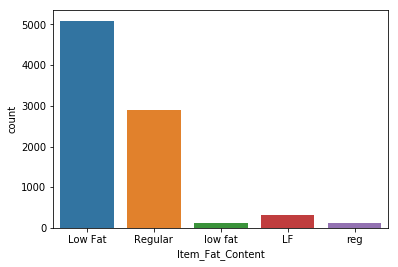

In [59]:
sns.countplot(train.Item_Fat_Content)

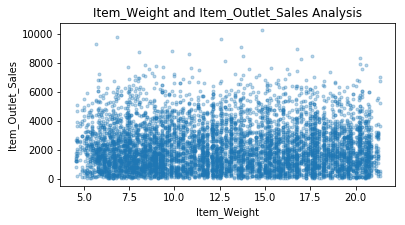

In [60]:
plt.figure(figsize=(6,3))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

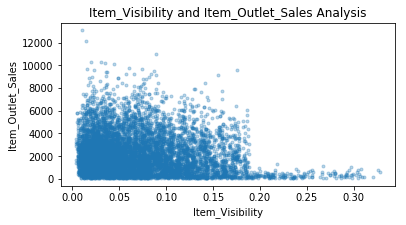

In [61]:
plt.figure(figsize=(6,3))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

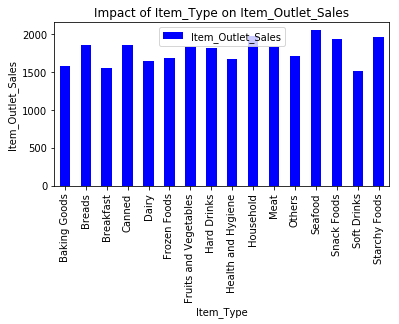

In [62]:
Item_Type_Pivot = \
train.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Type_Pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

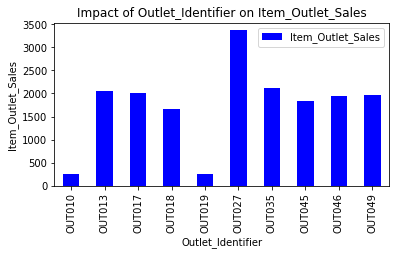

In [63]:
Outlet_Identifier_Pivot = \
train.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_Pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

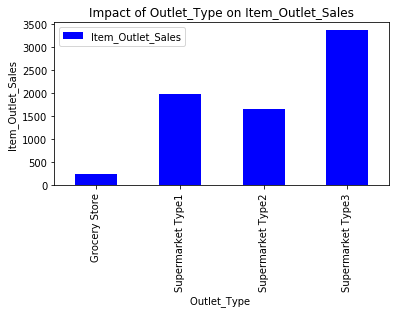

In [64]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(6,3))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=90)
plt.show()

In [8]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility               879
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [9]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

In [10]:
col = ["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size"]

In [11]:
print("freq distribution for each categorial column is-- \n")
for i in col:
    print("\n"+i)
    print(data[i].value_counts())

freq distribution for each categorial column is-- 


Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


In [12]:
# Replacing NaN values in Item_Weight with the mean value
data.fillna({"Item_Weight": data["Item_Weight"].mean()},inplace=True)

In [13]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility               879
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

In [14]:
data['Outlet_Size'].fillna(method='ffill',inplace=True)

In [15]:
data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility               879
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [16]:
# working on visibility
visibilty_avg=data.pivot_table(values="Item_Visibility",index="Item_Identifier")

In [17]:
print( visibilty_avg)

                 Item_Visibility
Item_Identifier                 
DRA12                   0.044920
DRA24                   0.045646
DRA59                   0.148204
DRB01                   0.091127
DRB13                   0.007648
DRB24                   0.020596
DRB25                   0.079407
DRB48                   0.026970
DRC01                   0.020653
DRC12                   0.037862
DRC13                   0.032467
DRC24                   0.026913
DRC25                   0.052616
DRC27                   0.066423
DRC36                   0.052147
DRC49                   0.070950
DRD01                   0.066330
DRD12                   0.084742
DRD13                   0.049125
DRD15                   0.064930
DRD24                   0.035205
DRD25                   0.091538
DRD27                   0.026416
DRD37                   0.015021
DRD49                   0.167987
DRD60                   0.040369
DRE01                   0.179808
DRE03                   0.026061
DRE12     

In [18]:
itm_visi = data.groupby('Item_Type')

In [19]:
data['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [20]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [21]:
data_frames=[]
for item,item_df in itm_visi:
    data_frames.append(itm_visi.get_group(item))
for i in data_frames:
    i["Item_Visibility"].fillna(value=i["Item_Visibility"].mean(),inplace=True)
    i["Item_Outlet_Sales"].fillna(value=i["Item_Outlet_Sales"].mean(),inplace=True)

  

In [22]:
print(data_frames)

[      Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
5              Regular           FDP36   51.4008         556.608800   
21             Regular           FDW12  144.5444        4064.043200   
23             Low Fat           FDC37  107.6938         214.387600   
48             Regular           FDL12   60.6220        2576.646000   
71             Regular           FDL12   59.2220         599.220000   
77             Low Fat           FDN48   89.9804         643.162800   
84             Regular           FDR12  171.3764        3091.975200   
106            Regular           FDA47  163.1210        1794.331000   
107            Regular           FDG12  121.3098        2530.705800   
156            Regular           FDB36  132.5626         262.325200   
179            Low Fat           FDO24  157.4604        3010.747600   
184            Regular           FDT12  226.8062        4739.830200   
201            Regular           FDE36  161.8868        3275.736000   
203  

In [23]:
new_data=pd.concat(data_frames)

In [24]:
print(new_data)

      Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
5              Regular           FDP36   51.4008         556.608800   
21             Regular           FDW12  144.5444        4064.043200   
23             Low Fat           FDC37  107.6938         214.387600   
48             Regular           FDL12   60.6220        2576.646000   
71             Regular           FDL12   59.2220         599.220000   
77             Low Fat           FDN48   89.9804         643.162800   
84             Regular           FDR12  171.3764        3091.975200   
106            Regular           FDA47  163.1210        1794.331000   
107            Regular           FDG12  121.3098        2530.705800   
156            Regular           FDB36  132.5626         262.325200   
179            Low Fat           FDO24  157.4604        3010.747600   
184            Regular           FDT12  226.8062        4739.830200   
201            Regular           FDE36  161.8868        3275.736000   
203   

In [25]:
new_data.apply(lambda x: sum(x.isnull()))

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
source                       0
Outlet_Years                 0
dtype: int64

In [26]:
new_data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [27]:
new_data['Item_Fat_Content'].replace({'LF': 'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [28]:
new_data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data=new_data
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type'])


In [30]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Outlet_Years,Outlet,...,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
5,FDP36,51.4008,556.6088,0.073297,10.395000,2009,OUT018,train,4,3,...,0,0,0,0,0,0,0,0,0,0
21,FDW12,144.5444,4064.0432,0.035400,12.792854,1985,OUT027,train,28,5,...,0,0,0,0,0,0,0,0,0,0
23,FDC37,107.6938,214.3876,0.057557,12.792854,1985,OUT019,train,28,4,...,0,0,0,0,0,0,0,0,0,0
48,FDL12,60.6220,2576.6460,0.121633,15.850000,1997,OUT046,train,16,8,...,0,0,0,0,0,0,0,0,0,0
71,FDL12,59.2220,599.2200,0.121532,15.850000,1987,OUT013,train,26,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [32]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]


In [33]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [34]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [35]:
x_label = ['Item_MRP', 'Item_Visibility', 'Item_Weight','Outlet_Years', 'Outlet', 'Item_Fat_Content_0','Item_Fat_Content_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0','Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_0', 'Item_Type_1','Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9','Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14', 'Item_Type_15']
y_label = ['Item_Outlet_Sales']

In [36]:
# from sklearn import preprocessing
# X= train[x_label].values
# y= train[y_label].values

# min_max_scaler = preprocessing.MinMaxScaler()
# X = min_max_scaler.fit_transform(X)

# x=np.insert(X,0,1,axis=1)   #for bias b

In [37]:
# def calculate_weight(x,y,epoch,print_interval):
#     print("Iteration","Error","Bias","\tWeight",sep="\t\t\t")
#     theta = np.zeros(len(x[0]))
#     m=y.size
#     for i in range(epoch):
#         h = (x@theta).reshape(-1,1)
#         error = ((y-h)**2).mean()
#         theta = theta - 0.0001*(1/m)*(x.T.dot(h-y)).reshape(-1)
#         print(str(i).center(10),error,theta[0],theta[1],sep="\t\t") if not i%print_interval else ""
#     print(str(i+1).center(10),error,theta[0],theta[1],sep="\t\t")
#     return theta


In [38]:
#  theta = calculate_weight(X,y,1000000,50000)

In [39]:
# rmse = np.sqrt(1275245.635843266)
# print(rmse)

In [40]:
# def Predict(p,theta):
#     return p@theta

# predictions = Predict(X,theta)
# print(predictions)


In [41]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
#decision tree model
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg0 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
alg0.fit(train[predictors], train[target])
train_predictions0 = alg0.predict(train[predictors])
cv_score0 = np.mean(cross_val_score(alg0,train[predictors], train[target], cv=20))

test[target] = alg0.predict(test[predictors])

IDcol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDcol})
submission.to_csv("predictions.csv", index = False)

rmse0 = np.sqrt(mean_squared_error(train[target].values, train_predictions0))

In [43]:
print("cv_score : ",cv_score0)
print("RMSE : " ,rmse0)
print("Accuracy : ",alg0.score( train[predictors],train[target]))

cv_score :  0.5874744065028807
RMSE :  1059.1553245838138
Accuracy :  0.6147364903595223


In [51]:
df = pd.read_csv("predictions.csv")
new_df =df.loc[(df['Item_Identifier'] == "FDL48")& (df['Outlet_Identifier'] == "OUT018")]
pred = new_df['Item_Outlet_Sales']
print(pred.values[0])

711.0628208695655


In [48]:

from sklearn.ensemble import RandomForestRegressor
alg1 = RandomForestRegressor(max_depth=2,random_state=0, n_estimators=100)
alg1.fit(train[predictors], train[target])
train_predictions1 = alg1.predict(train[predictors])
cv_score1 = np.mean(cross_val_score(alg1,train[predictors], train[target], cv=20))
rmse1 = np.sqrt(mean_squared_error(train[target].values, train_predictions1))

In [49]:
print("cv_score : ",cv_score1)
print("RMSE : " ,rmse1)
print("Accuracy : ",alg1.score( train[predictors],train[target]))

cv_score :  0.45114993726367586
RMSE :  1262.8411451956108
Accuracy :  0.4523084812624223


In [50]:
from sklearn.linear_model import LinearRegression

alg2 = LinearRegression()
alg2.fit(train[predictors], train[target])
train_predictions2 = alg2.predict(train[predictors])
cv_score2 = np.mean(cross_val_score(alg2,train[predictors], train[target], cv=20))
rmse2 = np.sqrt(mean_squared_error(train[target].values, train_predictions2))


In [51]:
print("cv_score : ",cv_score2)
print("RMSE : " ,rmse2)
print("Accuracy : ",alg2.score( train[predictors],train[target]))

cv_score :  0.5580525051909991
RMSE :  1128.2534605802773
Accuracy :  0.5628284237955508


In [52]:
from sklearn.svm import SVR
alg3 = SVR(kernel="rbf",C=2e4)
alg3.fit(train[predictors], train[target])
train_predictions3 = alg3.predict(train[predictors])
cv_score3 = np.mean(cross_val_score(alg3,train[predictors], train[target], cv=20))
rmse3 = np.sqrt(mean_squared_error(train[target].values, train_predictions3))

In [53]:
print("cv_score : ",cv_score3)
print("RMSE : " ,rmse3)
print("Accuracy : ",alg3.score( train[predictors],train[target]))

cv_score :  0.4089421035744164
RMSE :  704.5453154719786
Accuracy :  0.8295266749071014


In [54]:
test[target] = alg3.predict(test[predictors])

IDcol.append(target)
submission = pd.DataFrame({x : test[x] for x in IDcol})
submission.to_csv("SVRpredictions.csv", index = False)


In [66]:
df = pd.read_csv("SVRpredictions.csv")
new_df =df.loc[(df['Item_Identifier'] == "FDL48")& (df['Outlet_Identifier'] == "OUT018")]
pred = new_df['Item_Outlet_Sales']
print(pred.values[0])

949.2143475703492
